## Arithmetic and Geometric Random Walks

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

Read data for arithmetic and geometric random walks

In [2]:
xlsfile = pd.ExcelFile('http://analytics.romanko.ca/data/RandomWalks.xls')
ExxonPriceData = xlsfile.parse(sheet_name='ARW', header=2, parse_cols=2).iloc[0:,1]
numObsRW = len(ExxonPriceData)

### Arithmetic Random Walk

Create a vector of price changes

In [3]:
priceChangesARW = np.zeros((numObsRW - 1, 1))
for iObs in range(numObsRW-1):
    priceChangesARW[iObs] =  ExxonPriceData[iObs + 1] - ExxonPriceData[iObs]

Estimate parameters

In [4]:
muARW = np.mean(priceChangesARW)
sigmaARW = np.std(priceChangesARW)

Convert the estimated drift and volatility to annual values since the data for estimation were weekly, multiply by 52 (weeks in a year)

In [5]:
muARW = muARW * 52
sigmaARW = sigmaARW * np.sqrt(52)

Define function `ARWPaths` that computes random paths for arithmetic random walk

In [6]:
def ARWPaths(initPrice, mu, sigma, T, numSteps, numPaths):
    """
    Computes numPaths random paths for an arithmetic random walk.
    
    Args:
        mu: is the annual drift, sigma the annual volatility;
        T: is the total length of time for the path (in years).
    Returns:
        random paths for an arithmetic random walk.
    """
    paths = np.zeros((numSteps + 1, numPaths))
    
    # dT is the time increment (in years)
    dT = T / numSteps
    
    # Vector of paths will store realizations of the asset price
    # First asset price is the initial price
    paths[0] = [initPrice] * numPaths
 
    # Generate paths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] + mu * dT + sigma * np.sqrt(dT) * np.random.normal(0,1)
        
    # Plot paths
    [plt.plot(paths[:,i], linewidth=2) for i in range(numPaths)]
    plt.title('Arithmetic Random Walk Paths')
    
    return paths

Simulate paths for the arithmetic random walk

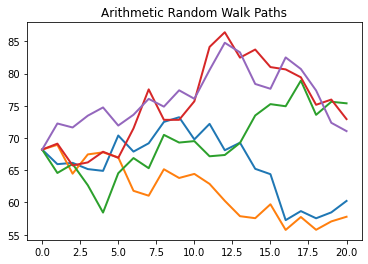

In [7]:
ARWPaths(ExxonPriceData[numObsRW-1], muARW, sigmaARW, 20.0/52, 20, 5);

### Geometric Random Walk

Create a vector of $\ln(S_{t+1}/S_t)$

In [8]:
priceRatiosGRW = np.zeros((numObsRW - 1,1))
for iObs in range(numObsRW - 1):
    priceRatiosGRW[iObs] = np.log(ExxonPriceData[iObs + 1] / ExxonPriceData[iObs])

Estimate parameters

In [9]:
sigmaGRW = np.std(priceRatiosGRW)
muGRW = np.mean(priceRatiosGRW) + 0.5 * sigmaGRW ** 2

Convert the estimated drift and volatility to annual values since the data for estimation were weekly, multiply by 52 (weeks in a year)


In [10]:
muGRW = muGRW * 52
sigmaGRW = sigmaGRW * np.sqrt(52)

Define function `GRWPaths` that computes random paths for geometric random walk

In [11]:
def GRWPaths(initPrice, mu, sigma, T, numSteps, numPaths):
    """
    Computes numPaths random paths for a geometric random walk.
    
    Args:
        mu: is the annual drift, sigma the annual volatility;
        T: is the total length of time for the path (in years).
    Returns:
        random paths for a geometric random walk.
    """   
    paths = np.zeros((numSteps + 1, numPaths))
    
    # dT is the time increment (in years)
    dT = T / numSteps
    
    # Vector of paths will store realizations of the asset price
    # First asset price is the initial price
    paths[0] = [initPrice] * numPaths
 
    # Generate paths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
    
    # Plot paths
    [plt.plot(paths[:,i], linewidth=2) for i in range(numPaths)]
    plt.title('Geometric Random Walk Paths')
    return paths

Simulate paths for the geometric random walk

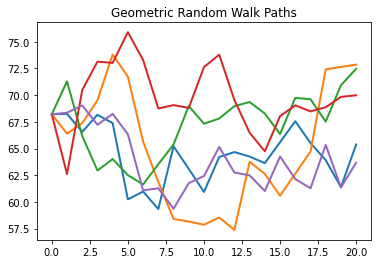

In [12]:
GRWPaths(ExxonPriceData[numObsRW - 1], muGRW, sigmaGRW, 20.0/52, 20, 5);